In [1]:
#dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

In [2]:
#load file into dataframe
df = pd.read_csv('resources/kickstart201801_cleaned.csv')
df.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374860 entries, 0 to 374859
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 42.9+ MB


In [4]:
from datetime import datetime

In [5]:
#converting launch string to datetime type
df['launched_timestamp'] = pd.to_datetime(df['launched'], infer_datetime_format=True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_timestamp
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11 12:12:28
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02 04:43:57
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12 00:20:50
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17 03:24:11
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04 08:35:03


In [6]:
#converting deadline string to datatime type
df['deadline_timestamp'] = pd.to_datetime(df['deadline'], infer_datetime_format=True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_timestamp,deadline_timestamp
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11 12:12:28,2015-10-09
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02 04:43:57,2017-11-01
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12 00:20:50,2013-02-26
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17 03:24:11,2012-04-16
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04 08:35:03,2015-08-29


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374860 entries, 0 to 374859
Data columns (total 17 columns):
ID                    374860 non-null int64
name                  374860 non-null object
category              374860 non-null object
main_category         374860 non-null object
currency              374860 non-null object
deadline              374860 non-null object
goal                  374860 non-null float64
launched              374860 non-null object
pledged               374860 non-null float64
state                 374860 non-null object
backers               374860 non-null int64
country               374860 non-null object
usd pledged           374860 non-null float64
usd_pledged_real      374860 non-null float64
usd_goal_real         374860 non-null float64
launched_timestamp    374860 non-null datetime64[ns]
deadline_timestamp    374860 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(8)
memory usage: 48.6+ MB


In [8]:
#calculating duration of each project
df['duration'] = pd.Series(delta.days for delta in (df['deadline_timestamp'] - df['launched_timestamp']))
df.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_timestamp,deadline_timestamp,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11 12:12:28,2015-10-09,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02 04:43:57,2017-11-01,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12 00:20:50,2013-02-26,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17 03:24:11,2012-04-16,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04 08:35:03,2015-08-29,55


In [9]:
#dropping unneccesary columns
df.drop(['currency','goal','deadline','launched','pledged','usd pledged','launched_timestamp','deadline_timestamp'],axis=1,inplace=True)
df.head()

,ID,name,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00,55


In [10]:
#stats on df
df.describe()

,ID,backers,usd_pledged_real,usd_goal_real,duration
count,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,374860.000000
mean,1.074652e+09,106.688366,9.120899e+03,4.586303e+04,33.497708
std,6.191368e+08,911.710124,9.131969e+04,1.158767e+06,66.232138
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,5.380633e+08,2.000000,3.100000e+01,2.000000e+03,29.000000
50%,1.075289e+09,12.000000,6.244950e+02,5.500000e+03,29.000000
75%,1.610137e+09,57.000000,4.050895e+03,1.600000e+04,36.000000
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08,16738.000000


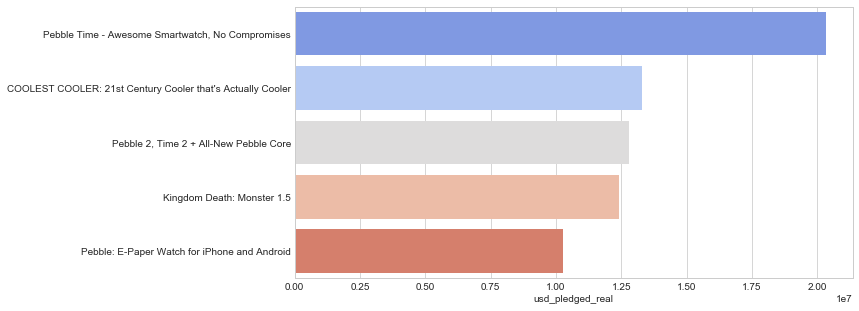

In [11]:
#plot of top 5 projects by usd pledge real
plt.figure(figsize=(10,5))
temp = df.sort_values(by='usd_pledged_real', ascending=False).head()
g = sns.barplot('usd_pledged_real', 'name', data=temp, palette='coolwarm');
plt.ylabel('');

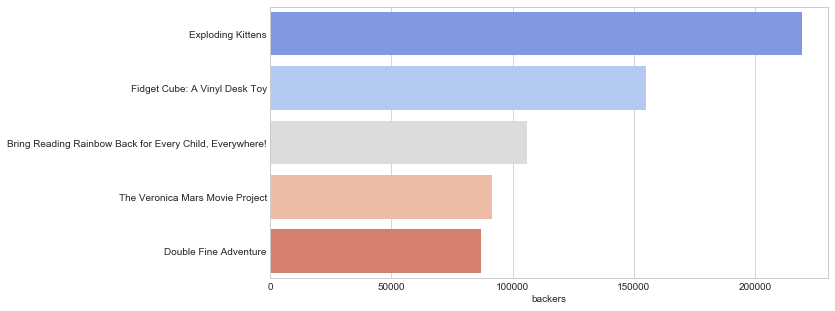

In [12]:
#plot of top 5 projects according to number of backers
plt.figure(figsize=(10,5))
temp = df.sort_values(by='backers', ascending=False).head()
g = sns.barplot('backers', 'name', data=temp, palette='coolwarm');
plt.ylabel('');

In [13]:
#average duration according to state of project
temp = df.groupby('state').mean()['duration']
temp = temp.sort_values(ascending=False)
print(temp)

state
suspended     43.495388
live          38.808792
canceled      37.272260
failed        34.174616
successful    31.156741
Name: duration, dtype: float64


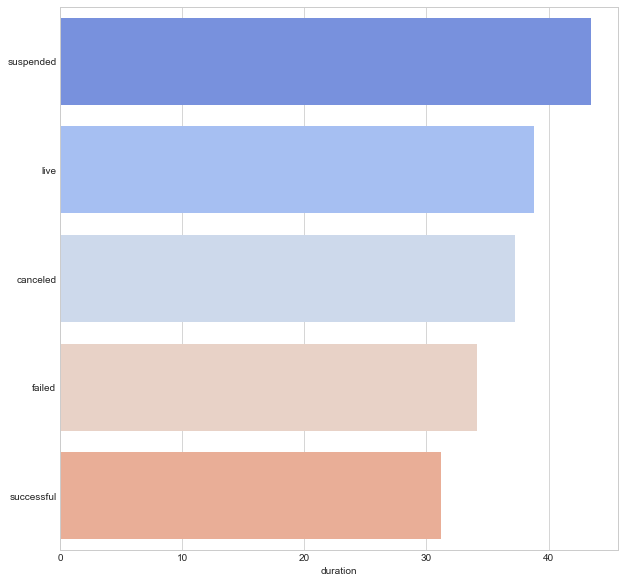

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=temp, y=temp.index);
plt.ylabel('');

In [15]:
#average backers according to state project
temp = df.groupby('state').mean()['backers']
temp = temp.sort_values(ascending=False)
print(temp)

state
successful    264.128397
suspended     105.253391
live           68.124017
canceled       26.002142
failed         16.431236
Name: backers, dtype: float64


In [16]:
#average usd goal real according to project state
temp = df.groupby('state').mean()['usd_goal_real']
temp = temp.sort_values(ascending=False)
print(temp)

state
suspended     175476.682919
canceled       75613.449092
failed         63189.222623
live           62548.695954
successful      9535.701785
Name: usd_goal_real, dtype: float64


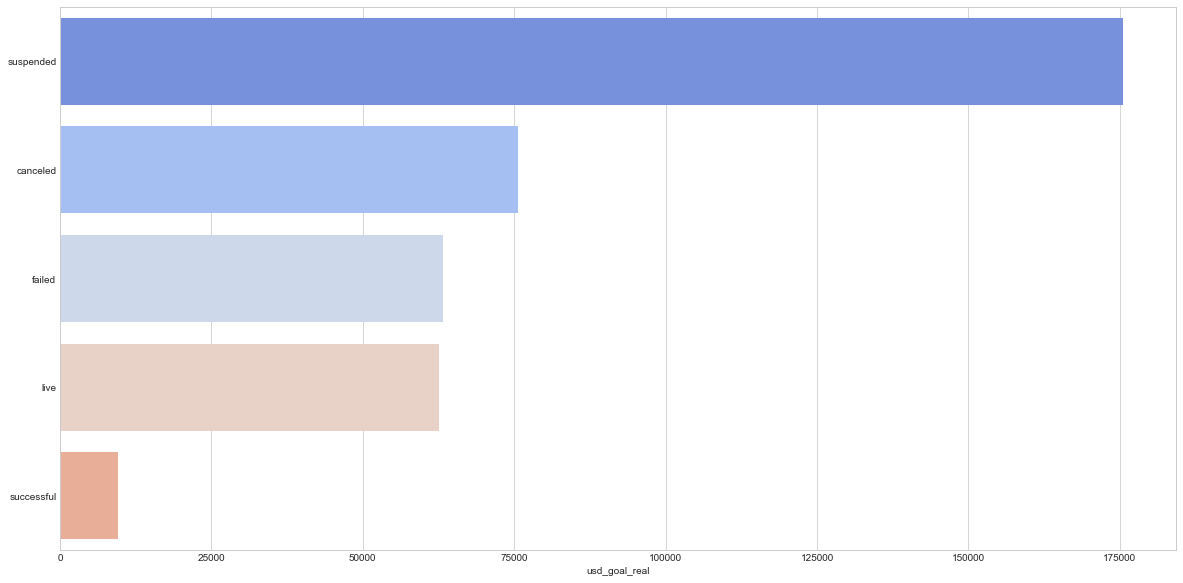

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=temp, y=temp.index);
plt.ylabel('');